<a href="https://colab.research.google.com/github/arjunkrishnasr/social-network-analytics-lab-digital-assessment2/blob/main/Clique_Percolation_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clique percolation method for community detection**

**Arjun Krishna S R**

**22MCB0038**

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

In [7]:
def clique_percolation(G, k):
    cliques = [frozenset(c) for c in nx.find_cliques(G) if len(c) >= k]
    communities = []
    
    # Build a graph of k-cliques as nodes
    clique_graph = nx.Graph()
    for clique in cliques:
        clique_graph.add_node(clique)
    
    # Add edges between k-cliques that share k-1 nodes
    for c1, c2 in combinations(clique_graph.nodes(), 2):
        shared_nodes = c1.intersection(c2)
        if len(shared_nodes) == k - 1:
            clique_graph.add_edge(c1, c2)
    
    # Find connected components in the clique graph
    for component in nx.connected_components(clique_graph):
        community = set()
        for clique in component:
            community.update(clique)
        communities.append(community)
    
    return communities

In [8]:
# Create a random graph for demonstration
G = nx.erdos_renyi_graph(n=50, p=0.1)

In [9]:
# Perform community detection using Clique Percolation Method
detected_communities = clique_percolation(G, k=3)

In [10]:
# Visualize the graph and detected communities
pos = nx.spring_layout(G, seed=42)

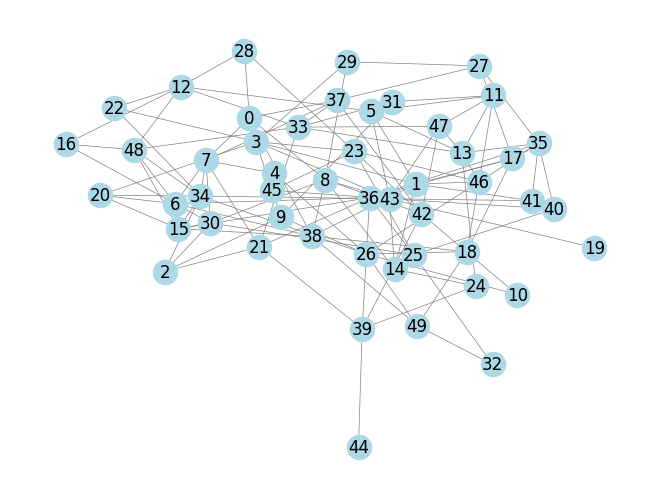

In [11]:
# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', width=0.5)

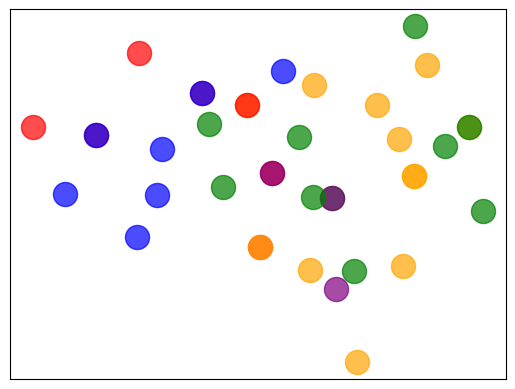

In [13]:
# Draw the detected communities
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i, community in enumerate(detected_communities):
    nx.draw_networkx_nodes(G, pos, nodelist=list(community), node_color=colors[i % len(colors)], alpha=0.7)